## **Aman Agrawal**

# 1. Package imports

In [1]:
# Required imports
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 2. Basic Python and academic integrity

1. Write a Python function called `integrity_check` that takes two arguments: one called `name` with no default, and one called `agree` that defaults to `False`.

   If `agree` is true, your function should print the following statement (using the `name` passed to the function):

    > I, {name}, will neither give nor receive unauthorized help on this exercise.

    If `agree` is false, your function should instead print
    
    > I, {name}, do not agree to the required academic integrity statement and should fail this examination.

2. **Use your function and your own full name to confirm that you in fact agree not to give or receive unauthorized help.**

In [2]:
# Answer in one or more Python cells here
def integrity_check(name , agree = False):
    """Intergrity check takes in 2 parameters, name and agree.\n
    Name should be a string value indicating your full name.\n
    Agree should be a boolean value. Please make sure to check the spellings."""

    if agree == False:
        print(f"I, {name}, do not agree to the required academic integrity statement and should fail this examination.")
    elif agree == True:
        print(f"I, {name}, will neither give nor receive unauthorized help on this exercise.")
    else:
        print(f"Please make sure 'agree' is either 'True' or 'False'.")

integrity_check("Aman Agrawal", True)

I, Aman Agrawal, will neither give nor receive unauthorized help on this exercise.


In [3]:
# DO NOT CHANGE OR DELETE THIS CELL
# Run this test cell to confirm your function works as expected 
integrity_check(name="Upstanding Humanbeing", agree=True)
integrity_check("Cheater McCheatface")
integrity_check(agree=True, name="Honest Abe")
integrity_check("Unethical Deservestofail", agree=False)

I, Upstanding Humanbeing, will neither give nor receive unauthorized help on this exercise.
I, Cheater McCheatface, do not agree to the required academic integrity statement and should fail this examination.
I, Honest Abe, will neither give nor receive unauthorized help on this exercise.
I, Unethical Deservestofail, do not agree to the required academic integrity statement and should fail this examination.


# 3. Real Estate Investment Trusts (REITs)

Download data from FRED on the Wilshire US Real Estate Investment Trust Total Market Index (`WILLREITIND`) as far back as is available (12/30/1977).

## Data overview

1. Provide a brief description of what kinds of investment returns the index is attempting to track.
2. Provide useful descriptive statistics for the returns on the index. Be careful and clear about what you are referring to where, e.g., daily or monthly returns.

Hint: You should be careful about how you handle missing values, perhaps using `dropna()` and/or the `fill_method` argument to `pct_change()` as described in pandas’ documentation.

In [4]:
# Answer in multiple Python and/or Markdown cells here
will_d = pdr.DataReader("WILLREITIND" , start = "1977-12-30" , data_source = "fred")

## Explaination
The Wilshire US Real Estate Investment Trust Index measures U.S. publicly traded Real Estate Investment Trusts by excluding securities like mortgage REITs, net-lease REITs, real estate finance companies, mortgage brokers and bankers, commercial and residential real estate brokers, home builders, large landowners and sub-dividers of unimproved land, hybrid REITs and timber REITs. The reason for the exclusions is that factors other than real estate supply and demand, such as interest rates, influence the market value of these companies.

Moreover, the daily data is availble from 31-Jan-1996 onward. Beforewhich only monthly data was available.

Source: [WILLREITIND Factsheet](https://assets-global.website-files.com/60f8038183eb84c40e8c14e9/618fde899ec9d28b5ebc5457_wilshire-us-reit-fact-sheet.pdf)

In [5]:
will_d = will_d.dropna()         #Since the daily data is available only after 31 Jan 1996, I deciced to drop the missing data points
will_d["returns"] = will_d["WILLREITIND"].pct_change()
will_d = will_d.dropna()
will_d.describe()

,WILLREITIND,returns
count,6731.000000,6731.000000
mean,5280.302582,0.000918
std,3547.600555,0.018537
min,97.150000,-0.197622
25%,1992.780000,-0.005042
50%,4796.490000,0.000820
75%,8402.425000,0.006794
max,15412.170000,0.189827


## Monthly returns

Calculate monthly returns using the last value of the index for each calendar month.

1. Plot the distribution of monthly returns.
2. When has the return been above 15% in a month? What was going on in those particular periods of time? 
3. When has the return been below -15% in a month? What was going on in those particular periods of time? 

In [6]:
will_m = pd.DataFrame(will_d["WILLREITIND"].resample("m").last())
will_m["returns"] = will_m.pct_change()
will_m = will_m.dropna()
will_m

,WILLREITIND,returns
DATE,,
1978-02-28,99.19,0.020998
1978-03-31,106.90,0.077730
1978-04-30,112.04,0.048082
1978-05-31,110.16,-0.016780
1978-06-30,107.95,-0.020062
...,...,...
2021-08-31,14404.07,0.019076
2021-09-30,13668.11,-0.051094
2021-10-31,14755.10,0.079527


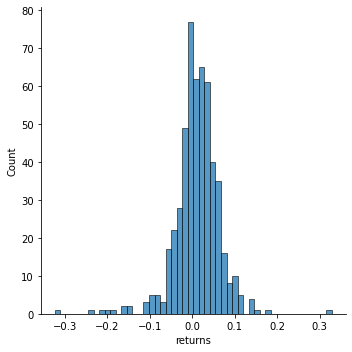

In [7]:
# Answer in multiple Python and/or Markdown cells here
sns.displot(data = will_m["returns"])

In [8]:
will_m[will_m["returns"] > 0.15]

,WILLREITIND,returns
DATE,,
2008-12-31,2992.39,0.177027
2009-04-30,2627.08,0.328566


In [9]:
will_m[will_m["returns"] < -0.15]

,WILLREITIND,returns
DATE,,
1978-10-31,103.51,-0.153154
1980-03-31,151.41,-0.154512
1987-10-31,567.50,-0.158599
2008-10-31,3369.61,-0.323837
2008-11-30,2542.33,-0.245512
2009-01-31,2451.33,-0.180812
2009-02-28,1915.69,-0.218510
2020-03-31,8844.68,-0.199598


## Explaination
We can see huge falls during the Black Monday, Lehman Brother's Financial Crisis and Covid-19 Pandemic. Following these crises we could notice some rebound periods due to the feds attempt to revive the economy. 

## Volatility

For each month, calculate the standard deviation of the daily returns within the month. (This is one way of calculating what is sometimes called the *realized volatility*.) Of course this is only possible for months in which you have daily return data.

1. Plot the realized volatility over time.
2. When has the realized volatility been above 5%? What was going on in those particular periods of time?

In [10]:
reit = pd.DataFrame(will_d["WILLREITIND"])
reit = reit.resample("M").last()
reit["returns"] = reit["WILLREITIND"].pct_change()
reit["std"] = will_d["returns"].resample("m").std()
reit = reit.dropna()
reit

,WILLREITIND,returns,std
DATE,,,
1996-02-29,1079.97,0.014113,0.002670
1996-03-31,1080.45,0.000444,0.004068
1996-04-30,1078.00,-0.002268,0.003693
1996-05-31,1103.81,0.023942,0.003200
1996-06-30,1124.80,0.019016,0.002830
...,...,...,...
2021-08-31,14404.07,0.019076,0.006294
2021-09-30,13668.11,-0.051094,0.009658
2021-10-31,14755.10,0.079527,0.008392


,WILLREITIND,returns,std
DATE,,,
2008-09-30,4983.43,-0.004186,0.051629
2008-10-31,3369.61,-0.323837,0.073970
2008-11-30,2542.33,-0.245512,0.085454
2008-12-31,2992.39,0.177027,0.091391
2009-01-31,2451.33,-0.180812,0.058531
2009-02-28,1915.69,-0.218510,0.052067
2009-03-31,1977.38,0.032202,0.076905
2009-04-30,2627.08,0.328566,0.068568
2009-05-31,2696.26,0.026333,0.051989


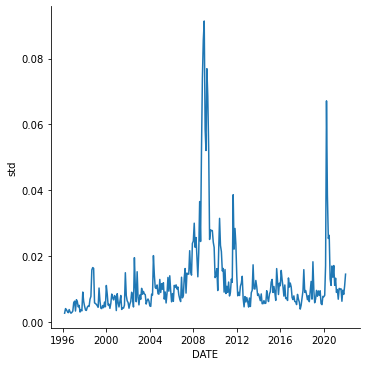

In [11]:
# Answer in multiple Python and/or Markdown cells here
sns.relplot(data = reit["std"] , kind = "line")
reit[reit["std"] > 0.05]

## Explaination
As discussed above, we could notice huge volatility during the 2008 lehman brother's crisis and covid-19 pandemic.

## Return–volatility relationship

Using descriptive statistics, graphs, and/or regressions as you see fit, how would you characterize the overall relationship between monthly returns and realized volatility in this market? What would you expect to find in other asset markets? Discuss and interpret in financial terms, not purely statistical ones.

In [12]:
# Answer in multiple Python and/or Markdown cells here
smf.ols("std ~ returns", reit).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    std   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     14.33
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           0.000185
Time:                        22:45:44   Log-Likelihood:                 938.33
No. Observations:                 311   AIC:                            -1873.
Df Residuals:                     309   BIC:                            -1865.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0125      0.001     18.336      0.000       0.011       0.014
returns       -0.0439      0.012     -3.785      0.000      -0.067      -0.021
==============================================================================
Omnibus:                      285.577   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5492.906
Skew:                           3.908   Prob(JB):                         0.00
Kurtosis:                      22.047   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As seen from the regression model, coef of returns is negative indicating a negative slope. This makes sense as, during recessions the volatility goes up and returns take a plunge while during bull runs the returns are positive but the volatility is low.  

# 4. Large Indian companies

Use the Wikipedia page “List of largest companies in India” to download data on the largest companies in India **according to the 2021 Forbes list**. (Note this is a list of only publicly traded companies, and the ranking takes multiple factors into account.)

## Data overview

Provide useful descriptive statistics on the 50 listed firms.

In [13]:
# Answer in multiple Python and/or Markdown cells here
wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_largest_companies_in_India")[0]
wiki.describe()

,Rank,Forbes 2000 rank,Revenue(billions US$),Assets(billions US$),Value(billions US$)
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1030.120000,14.188000,66.890000,25.972000
std,14.57738,556.933904,13.479321,101.280137,34.875481
min,1.00000,55.000000,1.600000,1.000000,1.400000
25%,13.25000,665.000000,5.675000,15.250000,4.950000
50%,25.50000,918.500000,10.000000,33.500000,13.950000
75%,37.75000,1530.500000,16.275000,76.825000,32.700000
max,50.00000,1967.000000,61.200000,638.100000,164.900000


## Firm size
1. According to Forbes’ ranking (in the “Forbes 2000 rank” column), the largest firm in India—Reliance Industries Limited—is the 55th biggest firm in the world. What fraction/percentage of the world’s 50 largest firms are in India? The world’s largest 100? 250? 500? 1000? 1500? 2000?
2. Is there any particular part of the world’s firm size ranking within the top 2000 where Indian firms appear particularly well represented? (Perhaps a range of 100 world ranking spots where more than 6% of the firms are in India?)

In [14]:
# Answer in multiple Python and/or Markdown cells here
world = [50,100,250,500,1000,1500,2000]
for i in world:
    placeholder = len(wiki[wiki["Forbes 2000 rank"] < i])/50
    print(f"Percentage of Indian companies in the top {i} companies of the world: {placeholder:.2%}")

Percentage of Indian companies in the top 50 companies of the world: 0.00%
Percentage of Indian companies in the top 100 companies of the world: 2.00%
Percentage of Indian companies in the top 250 companies of the world: 10.00%
Percentage of Indian companies in the top 500 companies of the world: 18.00%
Percentage of Indian companies in the top 1000 companies of the world: 54.00%
Percentage of Indian companies in the top 1500 companies of the world: 72.00%
Percentage of Indian companies in the top 2000 companies of the world: 100.00%


In [15]:
#Did the second part
percentage = []
for i in range(0,2000):
    percentage.append(len(wiki[wiki["Forbes 2000 rank"].isin(list(range(i,i+100)))])/100)
percentage = pd.DataFrame(percentage)
print(f"Between the world ranking {int(percentage.idxmax())} and {int(percentage.idxmax())+100}, India has {float(percentage.max()):.2%} companies.")
#Please note there are more than 1  data set with 8% returns

Between the world ranking 704 and 804, India has 8.00% companies.


## Financial ratios

Calculate the Total Asset Turnover (Revenue / Assets) for each firm on the list. Calculate the Revenue Multiple (Value / Revenue) for each firm.
1. Plot the distribution of TATOs across the 50 firms. There appears to be one outlier in the TATO distribution. What firm is it? Why might it have such a high TATO?
2. Plot the distribution of Revenue Multiple across the 50 firms. Where is the high-TATO outlier you identified in the last question in this distribution?
3. There are four industries with more than three firms on the list. (One of them is Banking, with 13 firms.) Which of these four industries seem to have a strong relationship between Assets and Revenue? Which seem to have a weaker relationship? Does this make sense in terms of underlying industry characteristics?

In [16]:
# Answer in multiple Python and/or Markdown cells here
wiki["TATO"] = wiki["Revenue(billions US$)"]/wiki["Assets(billions US$)"]
wiki["rev_multiple"] = wiki["Value(billions US$)"]/wiki["Revenue(billions US$)"]

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry,TATO,rev_multiple
41,42,1626,Rajesh Exports,Bangalore,32.6,0.1,4.1,2.0,Gems and jewellery,7.95122,0.06135


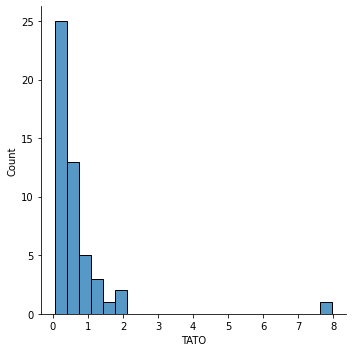

In [17]:
sns.displot(data=wiki["TATO"])
wiki[wiki.index == wiki["TATO"].idxmax()]
#Because it is an exports company thus not asset heavy

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry,TATO,rev_multiple
41,42,1626,Rajesh Exports,Bangalore,32.6,0.1,4.1,2.0,Gems and jewellery,7.95122,0.06135


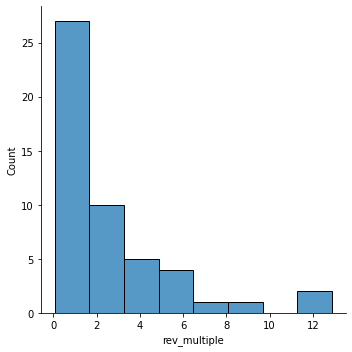

In [18]:
sns.displot(data=wiki["rev_multiple"])
wiki[wiki.index == wiki["TATO"].idxmax()]

## Explaination
Rajesh Exports has high Total Asset Turnover ratio because it is primarily engaged in the trade of gems and jewellery. Their particular business model doen't require large assets as compared to other firms since they are providing a service upon which they earn a commission/profit. They have a revenue multiple of 0.06135 which lies in the majority of the section. 

In [19]:
industries = ["Banking","Infotech","Oil and gas","Financials"]

for i in industries:
    placeholder = wiki[wiki["Industry"] == i][["Revenue(billions US$)","Assets(billions US$)"]]
    print(f"\n{i} correlation between asset and revenue :\n{placeholder.corr()}")


Banking correlation between asset and revenue :
                       Revenue(billions US$)  Assets(billions US$)
Revenue(billions US$)               1.000000              0.987905
Assets(billions US$)                0.987905              1.000000

Infotech correlation between asset and revenue :
                       Revenue(billions US$)  Assets(billions US$)
Revenue(billions US$)               1.000000              0.930999
Assets(billions US$)                0.930999              1.000000

Oil and gas correlation between asset and revenue :
                       Revenue(billions US$)  Assets(billions US$)
Revenue(billions US$)               1.000000              0.867699
Assets(billions US$)                0.867699              1.000000

Financials correlation between asset and revenue :
                       Revenue(billions US$)  Assets(billions US$)
Revenue(billions US$)               1.000000              0.776697
Assets(billions US$)                0.776697              1

## Explaination

Banking as a sector has highest correlation between assets and revenue, while financials has the least. This makes sense as the banking sector earns revenue from lending loans while  financial sector provides services and earns a fee for thier service.

# 5. Turkish insurance companies

Use the Wikipedia page “List of companies listed on the Istanbul Stock Exchange” to find the tickers of the six listed insurance companies with names starting between A and L; I impose this restriction because there seems not to be much data for companies starting with M–Z.

(Note: You can do this manually, or using e.g., `.str.lower()` to covert to lowercase and `.str.contains()` to find strings containing the word “insurance.”)

You should be able to pull daily data on four of these stocks from Yahoo Finance, although the ticker symbols will require some adjustment to indicate that they trade on the **IS**tambul stock exchange.

1. For the four companies for which you can get data from Yahoo Finance, pull daily data from 2005–2020 and plot the `Adj Close`s over the 16 year period.
2. What is the average daily return for each firm?
3. Calculate the correlation of daily returns across the four firms. All six correlations should be positive, but they are of course not exactly equal. Do there seem to be any “clusters” of firms among the four that are more correlated with each other?
4. There is *one* calendar month (January–December) during which every one of the four firms had average returns above 15bp per day. Which month was it?

In [20]:
# Answer in multiple Python and/or Markdown cells here
wiki_turk = pd.read_html("https://en.wikipedia.org/wiki/List_of_companies_listed_on_the_Istanbul_Stock_Exchange")[1]

In [21]:
symbols = list(wiki_turk[wiki_turk["Notes"].str.lower().str.contains("insurance").ffill()]["Symbol"])
suffix = ".IS"
df = pdr.DataReader([i+suffix for i in symbols], start="2005", end = "2020", data_source="yahoo")["Adj Close"]
df = df.drop(columns=["AVIVA.IS","GUSGR.IS"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'AVIVA.IS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'GUSGR.IS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


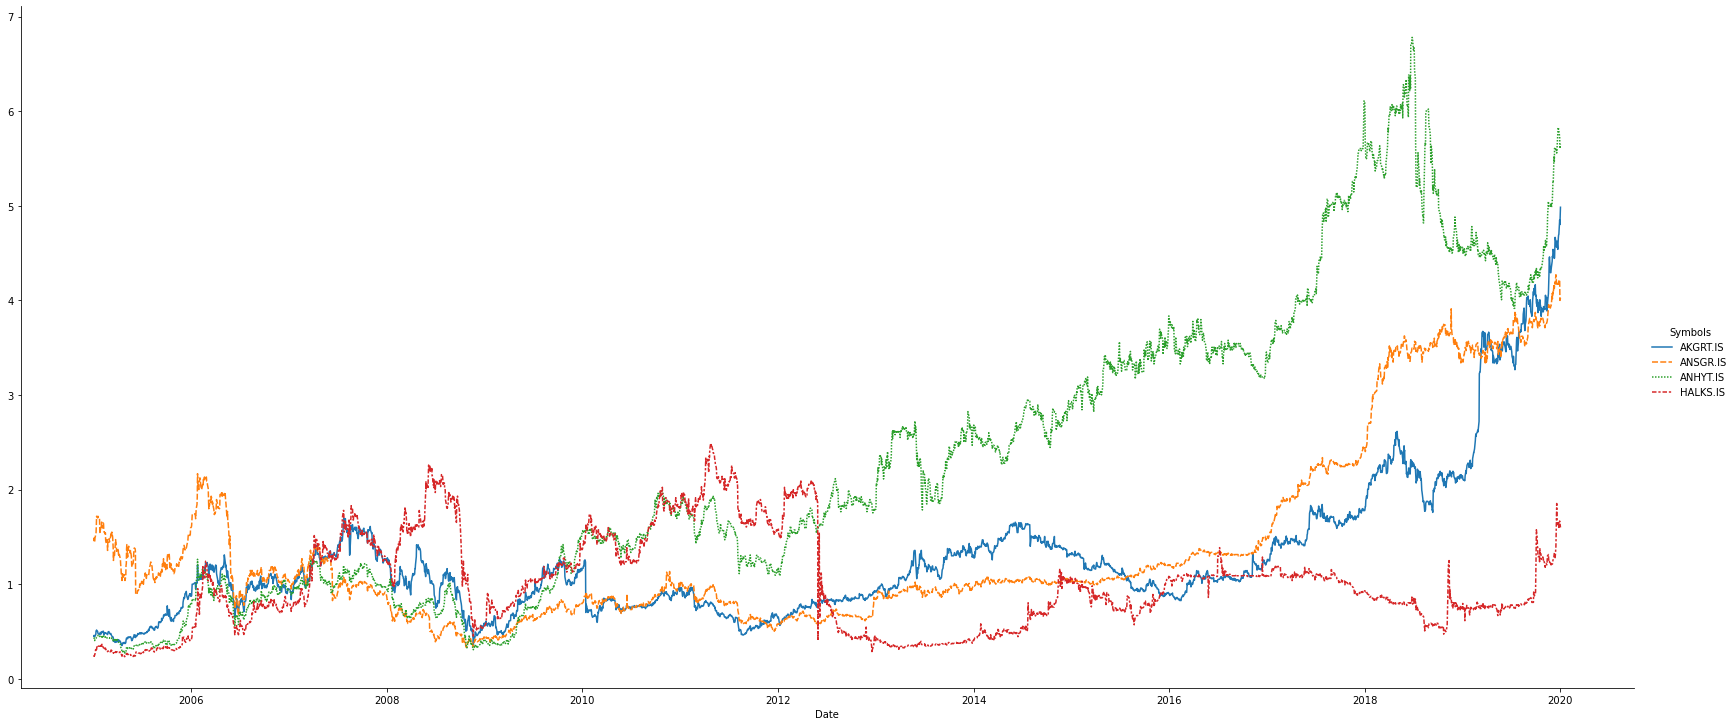

In [22]:
sns.relplot(data=df,kind= "line",height=10, aspect = 2.3)

In [23]:
df_ret = df.pct_change() 
df_ret.mean()

Symbols
AKGRT.IS    0.000968
ANSGR.IS    0.000528
ANHYT.IS    0.000914
HALKS.IS    0.001451
dtype: float64

In [24]:
df_ret.corr()

Symbols,AKGRT.IS,ANSGR.IS,ANHYT.IS,HALKS.IS
Symbols,,,,
AKGRT.IS,1.000000,0.447376,0.425613,0.220500
ANSGR.IS,0.447376,1.000000,0.488854,0.218411
ANHYT.IS,0.425613,0.488854,1.000000,0.213837
HALKS.IS,0.220500,0.218411,0.213837,1.000000


In [25]:
xyz = df_ret.resample("m").mean()
xyzqwe = xyz.groupby(by=xyz.index.month).mean()
xyzqwe[xyzqwe > 0.0015].dropna()

Symbols,AKGRT.IS,ANSGR.IS,ANHYT.IS,HALKS.IS
Date,,,,
12,0.002429,0.002217,0.003821,0.001951


## Explaination

Tickers AKGRT.IS, ANSGR.IS & ANHYT.IS have thea similar correlarion, while HALKS.IS has a lower correlation to all of them. 

December has the average daily returns for all the firms to be more than 15BP.


# 6. CAPM Betas during COVID

## Data construction

We pulled daily data on the S&P500 companies from Yahoo Finance via `pandas_datareader` for a homework assignment. Rather than re-pull it via the API, you can access the saved data on the course github page (or accessing directly using `pd.read_csv()`) at [https://lukestein-classes.github.io/fdap/data/sp500yahoofinance.csv](https://lukestein-classes.github.io/fdap/data/sp500yahoofinance.csv).

You can then read the file into pandas using code like
```python
path = "sp500yahoofinance.csv"
df = pd.read_csv(path, index_col=0, header=[0,1], parse_dates=True)
```
where the `index_col` argument means that the first column should be interpreted as an index, the `header` argument that the first two rows should be interpreted as the column names, and `parse_dates` that the index should be read as a date.

1. Generate a DataFrame of daily returns using `df_returns = df["Adj Close"].pct_change()`.

2. You can then generate a list of tickers using `list(df_returns.columns)`. How many tickers are there? How many firms are there?

3. Calculate the (equal-weighted) average daily return across all tickers; we will use this as a proxy for market returns. You can do this using `df_returns["mkt"] = df_returns.mean(axis=1)`. What was the average daily return and standard deviation for our market proxy in 2020? In 2021?

4. *Using weeks running Thursday–Wednesday*, which week had the highest average daily market return? Which week had the lowest?

5. Are there any Thursday–Wednesday weeks in the sample with only 1–3 trading days in them? Are there any Monday–Friday weeks with only 1–3 trading days?

In [26]:
# Answer in multiple Python and/or Markdown cells here
df_6 = pd.read_csv("https://lukestein-classes.github.io/fdap/data/sp500yahoofinance.csv", index_col=0, header=[0,1], parse_dates=True)

In [27]:
df_returns = df_6["Adj Close"].pct_change()
df_returns.columns = df_returns.columns.str.replace("-","")
tickers = list(df_returns.columns)
len(tickers) 

505

## Explaination

We have 5 companies with more than 1 ticker thus resulting in length of tickers to be more than 500, as S&P500 should be.

In [28]:
incomplete_tickers = (df_returns.isnull().sum()>1)
partial_data = list(incomplete_tickers[incomplete_tickers].index)
tickers = set(tickers) - set(partial_data)

In [40]:
df_returns["mkt"] = df_returns.mean(axis=1)
print(f"Average daily return for market in the CY2020 = {df_returns[df_returns.index.year == 2020]['mkt'].mean():.2%}")
print(f"Standard deviation for market returns in the CY2020 = {df_returns[df_returns.index.year == 2020]['mkt'].std():.2%}")
print(f"Average daily return for market in the CY2021 = {df_returns[df_returns.index.year == 2021]['mkt'].mean():.2%}")
print(f"Standard deviation for market returns in the CY2021 = {df_returns[df_returns.index.year == 2021]['mkt'].std():.2%}")

Average daily return for market in the CY2020 = 0.10%
Standard deviation for market returns in the CY2020 = 2.42%
Average daily return for market in the CY2021 = 0.12%
Standard deviation for market returns in the CY2021 = 0.84%


In [30]:
df_week = df_returns.resample("W-wed").mean()
max = df_week[df_week.index == df_week["mkt"].idxmax()]["mkt"]
min = df_week[df_week.index == df_week["mkt"].idxmin()]["mkt"]
print(f"Max average return for the week : \n{max}\n")
print(f"Min average return for the week : \n{min}\n")

Max average return for the week : 
Date
2020-04-08    0.027405
Freq: W-WED, Name: mkt, dtype: float64

Min average return for the week : 
Date
2020-03-18   -0.034546
Freq: W-WED, Name: mkt, dtype: float64



In [31]:
df_week_tw_count = df_returns.resample("W-wed").count()["mkt"]
print(f"Number of Thu-Wed weeks with 1-3 days of data: {len(df_week_tw_count[(df_week_tw_count <= 3) & (df_week_tw_count >= 1)])}")

df_week_count = df_returns.resample("w").count()["mkt"]
print(f"Number of Mon-Thu weeks with 1-3 days of data: {len(df_week_count[(df_week_count <= 3) & (df_week_count >= 1)])}")

Number of Thu-Wed weeks with 1-3 days of data: 1
Number of Mon-Thu weeks with 1-3 days of data: 1


## Beta calculation and analysis

Set up an (empty) dataframe with one row for each ticker using
```python
df_firms = pd.DataFrame(index=tickers, columns=["beta2020", "beta2021"], dtype=float)
```

The main task (challenging!) is to populate your `df_firms` DataFrame with firm-level estimates of CAPM beta for 2020 and 2021 using daily return data and our `mkt` index.

Things you will have to be careful of include:
- `statsmodels` may have a problem with tickers including non-letter symbols.
- Not every company in the S&P 500 existed in both years.

1. What was the average beta for 2020? What was the average beta for 2021? Discuss.

2. Regress 2021 betas on 2020 betas (you may also want to draw a scatterplot using e.g., `sns.lmplot(data=df_firms, x="beta2020", y="beta2021")`). Offer any commentary on the stability of firm-level beta estimates, perhaps by interpreting your estimated regression results.

In [32]:
# Answer in multiple Python and/or Markdown cells here

df_firms = pd.DataFrame(index=tickers, columns=["beta2020", "beta2021"], dtype=float)


In [33]:
complete_dfret = df_returns.drop(columns = partial_data)

In [34]:
tickers = [t+" ~ mkt" for t in tickers]

In [35]:
beta_2020 = []
for i in tickers:
    reg = smf.ols(i,complete_dfret.loc["2020"]).fit()
    beta = reg.params["mkt"]
    beta_2020.append(beta)

beta_2021 = []
for i in tickers:
    reg = smf.ols(i,complete_dfret.loc["2021"]).fit()
    beta = reg.params["mkt"]
    beta_2021.append(beta)

df_firms["beta2020"] = beta_2020
df_firms["beta2021"] = beta_2021
    

In [36]:
df_firms.mean()

beta2020    1.000687
beta2021    1.000343
dtype: float64

*Since I wasn't allowed to "discuss" with anyone else regarding this exam, here is a hypothetical discusion between my favourite comic characrters:*

Calvin: What does beta signify?

Hobbes: It signifies how the stock moves as compared to the market.

Calvin: So in 2020 saw bigger movements as compared to 2021 because the beta of 2020 is higher than 2021's beta?

Hobbes: Yes, this might be owing to the fact that 2020 saw the peak covid time with higher volatility. 

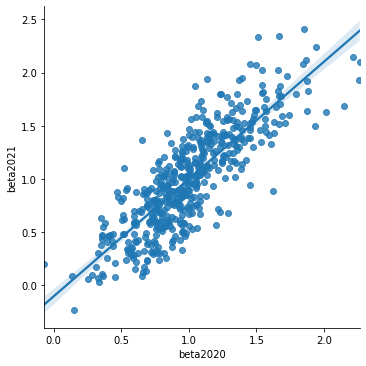

In [37]:
sns.lmplot(data=df_firms, x="beta2020", y="beta2021")

In [38]:
smf.ols("beta2021 ~ beta2020",df_firms).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               beta2021   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1078.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.79e-127
Time:                        22:46:10   Log-Likelihood:                -50.341
No. Observations:                 502   AIC:                             104.7
Df Residuals:                     500   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1033      0.036     -2.897      0.004      -0.173      -0.033
beta2020       1.1029      0.034     32.837      0.000       1.037       1.169
==============================================================================
Omnibus:                        0.708   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.657
Skew:                           0.089   Prob(JB):                        0.720
Kurtosis:                       3.006   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""